<a href="https://colab.research.google.com/github/bradmuzza/OTB/blob/master/220559002_assignment_2_T2_2021__Resnet_training_WIP_almost_finisehd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIT744 Assignment 2: Transfer learning and Efficient Training of Deep Learning Models 

<div class="alert-info">
    <p>Due: <strong>8:00pm 20 September 2021</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>45%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import PIL
import PIL.Image
import io
from IPython.display import Image
import pydot
import graphviz
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,TensorBoard
import datetime 
from google.colab import drive
from keras.layers import BatchNormalization
drive.mount('/content/drive')

Mounted at /content/drive


## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

## Task 1 Solving MNIST with Convolutional Neural Networks

*(weight ~15%)*

In Assignment 1, you tackled the image classification problem in MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to achieve better image classification performance.

### Task 1.1 Revisit MNIST classification with DNN

*(weight ~1%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [ ]:
#increase the training time and patience = 300, batch size up to 256 on Early stopage and epochs =1500 

data_set = keras.datasets.mnist
(x_train, y_train), (xtest, ytest)= data_set.load_data() 

batchSize = 256 
validationSetSize = 10_000

def transformdata(image,label):
  image =  tf.cast(image, tf.float32)/255
  lable  =  tf.one_hot(label,10)
  return tf.reshape(image,[28*28,]),label

  
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).map(lambda x,y:(transformdata(x,y)), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).shuffle(1000)

test_dataset = tf.data.Dataset.from_tensor_slices((xtest,ytest)).map(lambda x,y:(transformdata(x,y)),num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).batch(10000)

val_dataset = dataset.take(validationSetSize).batch(batchSize)
train_dataset =dataset.skip(validationSetSize).batch(batchSize)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape=(28 * 28,)),
keras.layers.Dense(512,activation = 'relu'), 
BatchNormalization(),                
keras.layers.Dense(124,activation = 'relu'),
BatchNormalization(),    
keras.layers.Dense(30,activation = 'relu'), 
BatchNormalization(),                                               
keras.layers.Dense(10,activation = 'softmax')
])
print(model.summary())
model.compile(loss= keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

plot_model(model=model,show_shapes=True,show_layer_names=True)
Image("model.png")

TB =TensorBoard(
    log_dir="./logs/run 1.1",
    histogram_freq=0,
    write_images=True,
    write_graph=True
)

ES=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=300,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)
MC = ModelCheckpoint(
    filepath="drive/MyDrive/my_best_model.epoch{epoch:02d}-loss{val_loss:.2f} run 1.hdf5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=True,
    mode="auto",
    save_freq="epoch",
 
)
epochs =2000
history = model.fit(train_dataset,epochs=epochs,callbacks= [TB,ES,MC], verbose=0, validation_data=val_dataset) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 124)               63612     
_________________________________________________________________
batch_normalization_1 (Batch (None, 124)               496       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3750      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3

In [ ]:
print("test score")
print(model.evaluate(test_dataset, verbose=1))
model.save("./drive/My Drive/DNN_model")
print("validation score")
print(model.evaluate(val_dataset, verbose=1))

test score
1/1 [==============================] - 0s 475ms/step - loss: 0.0843 - accuracy: 0.9854
[0.08428336679935455, 0.9854000210762024]
INFO:tensorflow:Assets written to: ./drive/My Drive/DNN_model/assets
validation score
40/40 [==============================] - 1s 15ms/step - loss: 0.0537 - accuracy: 0.9904
[0.05374030023813248, 0.9904000163078308]


In [ ]:
# save history 
np.save('./drive/My Drive/DNN_model_history.npy',history.history)

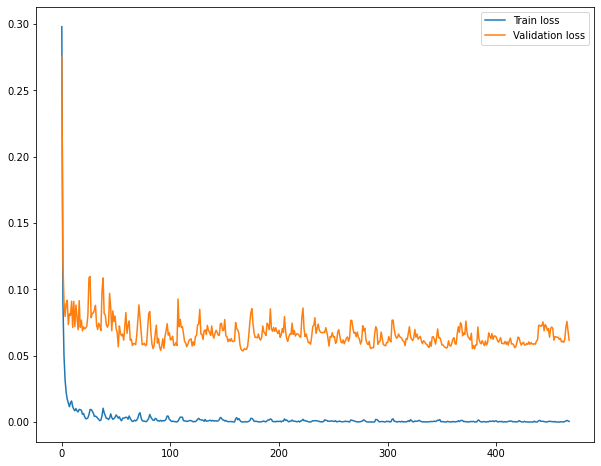

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

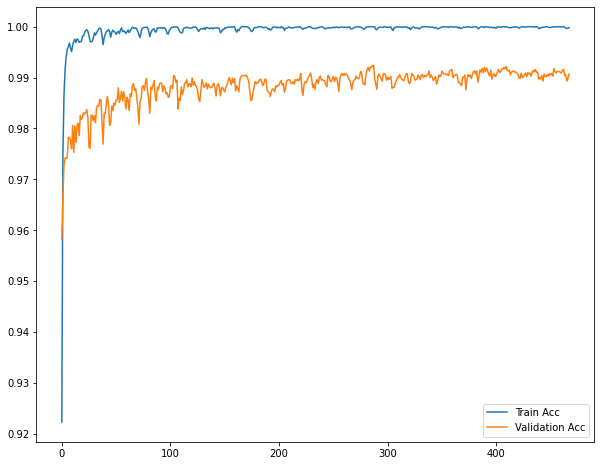

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.legend()
plt.show()

### Task 1.2 Train a ConvNet from scratch

*(weight ~5%)*

Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [ ]:

batchSize = 256 
validationSetSize = 10_000

def transformdata(image,label):
  image =  tf.cast(image, tf.float32)/255
  lable  =  tf.one_hot(label,10)
  return tf.reshape(image,[28,28,1]),label

dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).map(lambda x,y:transformdata(x,y),num_parallel_calls=tf.data.AUTOTUNE).cache().shuffle(10*batchSize)

test_dataset = tf.data.Dataset.from_tensor_slices((xtest,ytest)).map(lambda x,y:transformdata(x,y),num_parallel_calls=tf.data.AUTOTUNE).cache().batch(10000)

val_dataset = dataset.take(validationSetSize).batch(batchSize).prefetch(tf.data.AUTOTUNE)
train_dataset =dataset.skip(validationSetSize).batch(batchSize).prefetch(tf.data.AUTOTUNE)

train_dataset.take(1)

<TakeDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.uint8)>

In [ ]:
conv_model= keras.models.Sequential([
keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1), padding= 'same'),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(128,(3,3),activation = 'relu', padding= 'same'),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(254,(3,3),activation = 'relu', padding= 'same'),
keras.layers.Flatten(),
keras.layers.Dense(254,activation = 'relu'), 
keras.layers.Dense(128,activation = 'relu'),                         
keras.layers.Dense(10,activation = 'softmax')
])
print(conv_model.summary())
conv_model.compile(loss= keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 254)         292862    
_________________________________________________________________
flatten_3 (Flatten)          (None, 12446)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 254)              

In [ ]:

TB =TensorBoard(
    log_dir="./logs/CNN run 2.1",
    histogram_freq=0,
    write_images=True,
    write_graph=True
)

ES=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)
epochs =2000
history = conv_model.fit(train_dataset,epochs=epochs,callbacks= [TB,ES], verbose=0, validation_data=val_dataset) 

Restoring model weights from the end of the best epoch.
Epoch 00502: early stopping


In [ ]:
print("test score")
print(conv_model.evaluate(test_dataset, verbose=1))
conv_model.save("./drive/My Drive/CNN_model 2")
print("validation score")
print(conv_model.evaluate(val_dataset, verbose=1))
np.save('./drive/My Drive/CNN_model_history_2.npy',history.history)

test score
1/1 [==============================] - 1s 668ms/step - loss: 0.0801 - accuracy: 0.9941
[0.08009826391935349, 0.9940999746322632]
INFO:tensorflow:Assets written to: ./drive/My Drive/CNN_model 2/assets
validation score
40/40 [==============================] - 1s 15ms/step - loss: 0.0010 - accuracy: 0.9998
[0.0010043323272839189, 0.9998000264167786]


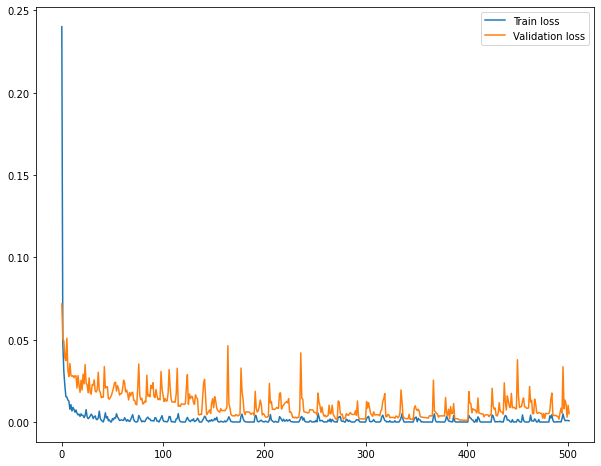

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

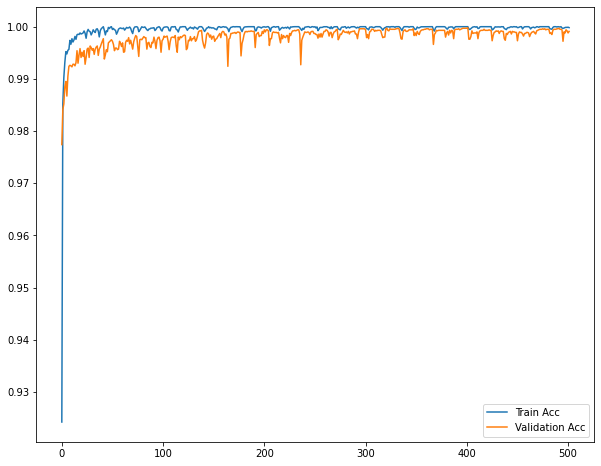

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.legend()
plt.show()


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~3%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [ ]:
Image_size= 28 
batchSize = 256
def randomise_image(image):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_crop(image,size=(Image_size,Image_size,1))
  image = tf.image.resize(image, (Image_size, Image_size))
  return image
 
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).map(lambda x,y:transformdata(x,y)).map(lambda w,z:(randomise_image(w),z), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).shuffle(10*batchSize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((xtest,ytest)).map(lambda x,y:transformdata(x,y)).map(lambda w,z:(randomise_image(w),z), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).batch(10000)
val_dataset = dataset.take(validationSetSize).batch(batchSize)
train_dataset =dataset.skip(validationSetSize).batch(batchSize)

conv_model_data_aug= keras.models.Sequential([
keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1), padding= 'same'),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(128,(3,3),activation = 'relu', padding= 'same'),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(254,(3,3),activation = 'relu', padding= 'same'),
keras.layers.Flatten(),
keras.layers.Dense(254,activation = 'relu'), 
keras.layers.Dense(128,activation = 'relu'),                         
keras.layers.Dense(10,activation = 'softmax')
])
print(conv_model_data_aug.summary())
conv_model_data_aug.compile(loss= keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

TB =TensorBoard(
    log_dir="./logs/CNN run 2 data aug",
    histogram_freq=0,
    write_images=True,
    write_graph=True
)

ES=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

epochs =502 
history = conv_model_data_aug.fit(train_dataset, steps_per_epoch=int(50000/batchSize), validation_steps =int(10000/batchSize) ,epochs=epochs,callbacks= [TB,ES], verbose=0, validation_data=val_dataset) 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 254)         292862    
_________________________________________________________________
flatten_7 (Flatten)          (None, 12446)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 254)              

In [ ]:
print("test score")
print(conv_model_data_aug.evaluate(test_dataset, verbose=1))
conv_model_data_aug.save("./drive/My Drive/CNN_model 2 data_aug")
print("validation score")
print(conv_model_data_aug.evaluate(val_dataset, verbose=1))
np.save('./drive/My Drive/CNN_model_history_2 data_aug.npy',history.history)

test score
1/1 [==============================] - 2s 2s/step - loss: 0.1400 - accuracy: 0.9844
[0.14000779390335083, 0.9843999743461609]
INFO:tensorflow:Assets written to: ./drive/My Drive/CNN_model 2 data_aug/assets
validation score
40/40 [==============================] - 2s 37ms/step - loss: 7.4724e-05 - accuracy: 1.0000
[7.472401921404526e-05, 1.0]


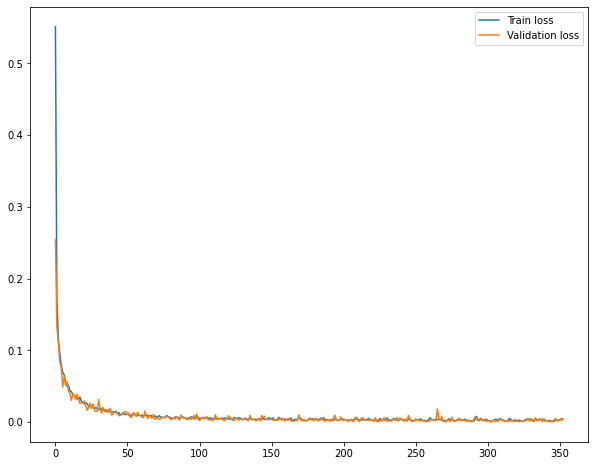

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

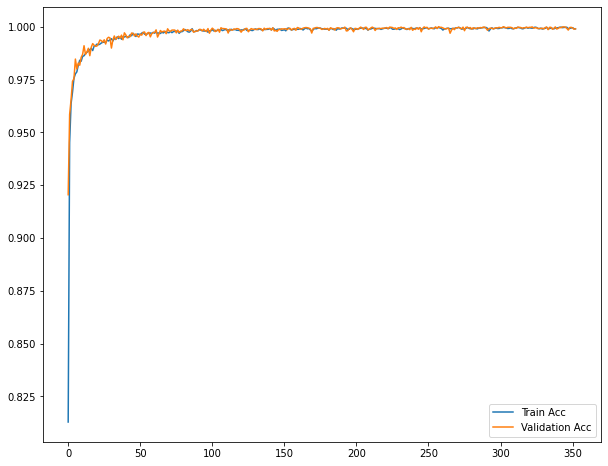

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Validation Acc")
plt.legend()
plt.show()

### Task 1.4 MNIST with transfer learning

*(weight ~3%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

Image_size= 75 
batchSize = 256
validationSetSize = 10_000

def transformdata(image,label):
  image =  tf.cast(image, tf.float32)/255
  lable  =  tf.one_hot(label,10)
  return tf.reshape(image,[28,28,1]) ,label


#  removed data aug to compare with fine tunned model for with feature extraction 
def randomise_image(image):
  # image = tf.image.random_flip_left_right(image)
  # image = tf.image.random_flip_up_down(image)
  # image = tf.image.random_flip_left_right(image)
  image = tf.image.resize(image, (Image_size, Image_size))
  image =tf.image.grayscale_to_rgb(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  return tf.keras.applications.vgg16.preprocess_input(image)
 
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).map(lambda x,y:transformdata(x,y)).map(lambda w,z:(randomise_image(w),z), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).shuffle(10*batchSize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((xtest,ytest)).map(lambda x,y:transformdata(x,y)).map(lambda w,z:(randomise_image(w),z), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).batch(500)
val_dataset_tran = dataset.take(validationSetSize).batch(batchSize)
train_dataset_tran =dataset.skip(validationSetSize).batch(batchSize)


val_dataset_tran.take(1)


<TakeDataset shapes: ((None, 75, 75, 3), (None,)), types: (tf.float32, tf.uint8)>

In [ ]:

conv_base=tf.keras.applications.VGG16(input_shape = (75, 75, 3), 
                                include_top = False, 
                                weights = 'imagenet')

conv_base.trainable = False
conv_base.summary()



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [ ]:
Fine_tunning_model=keras.models.Sequential()                                         
Fine_tunning_model.add(conv_base)
Fine_tunning_model.add(keras.layers.Flatten())
Fine_tunning_model.add(keras.layers.Dense(254,activation = 'relu'))
Fine_tunning_model.add(keras.layers.Dense(128,activation = 'relu'))                         
Fine_tunning_model.add(keras.layers.Dense(10,activation = 'softmax'))


Fine_tunning_model.compile(loss= keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(2e-5),metrics=["accuracy"])
Fine_tunning_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 254)               520446    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32640     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 15,269,064
Trainable params: 554,376
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
TB =TensorBoard(
    log_dir="./logs/CNN run 2 data aug fine tuning -top",
    histogram_freq=0,
    write_images=True,
    write_graph=True
)

ES=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

history_before_fine_tunning =Fine_tunning_model.fit(
      train_dataset_tran,
      epochs=50,
      steps_per_epoch=int(50000/batchSize), 
      validation_steps =int(10000/batchSize),
      verbose=0, validation_data=val_dataset_tran,
      callbacks= [TB,ES]
      )

In [ ]:
print("Results before fine tunning")
print("test score")
print(Fine_tunning_model.evaluate(test_dataset, verbose=1))
Fine_tunning_model.save("./drive/My Drive/CNN_model_fine_tunning_aug")
print("validation score")
print(Fine_tunning_model.evaluate(val_dataset_tran, verbose=1))
np.save('./drive/My Drive/CNN history_before_fine_tunning.npy',history_before_fine_tunning.history)

Results before fine tunning
test score
20/20 [==============================] - 12s 567ms/step - loss: 0.6954 - accuracy: 0.8082
[0.6954401731491089, 0.8082000017166138]
INFO:tensorflow:Assets written to: ./drive/My Drive/CNN_model_fine_tunning_aug/assets
validation score
40/40 [==============================] - 12s 271ms/step - loss: 0.7085 - accuracy: 0.8003
[0.7084708213806152, 0.8003000020980835]


In [ ]:
for layer in conv_base.layers:
    if (layer.name =='block5_conv3')|(layer.name=='block5_conv2'):
        layer.trainable = True 
    else:
        layer.trainable = False 


In [ ]:
Fine_tunning_model.compile(loss= keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(2e-5),metrics=["accuracy"])
history_after_fine_tunning =Fine_tunning_model.fit(
      train_dataset_tran,
      epochs=30,
      steps_per_epoch=int(50000/batchSize), 
      validation_steps =int(10000/batchSize),
      verbose=0, validation_data=val_dataset_tran,
      callbacks= [TB,ES]
      )

In [ ]:
print("Result After Fine tunning")
print("test score")
print(Fine_tunning_model.evaluate(test_dataset, verbose=1))
Fine_tunning_model.save("./drive/My Drive/CNN_model_fine_tunning_aug")
print("validation score")
print(Fine_tunning_model.evaluate(val_dataset_tran, verbose=1))
np.save('./drive/My Drive/CNN_history_after_fine_tunning.npy',history_after_fine_tunning.history)

Result After Fine tunning
test score
20/20 [==============================] - 12s 579ms/step - loss: 0.5220 - accuracy: 0.8504
[0.5219848155975342, 0.8503999710083008]
INFO:tensorflow:Assets written to: ./drive/My Drive/CNN_model_fine_tunning_aug/assets
validation score
40/40 [==============================] - 12s 278ms/step - loss: 0.5307 - accuracy: 0.8434
[0.5306852459907532, 0.8434000015258789]


### Task 1.5 Performance comparison

*(weight ~3%)*

How many parameters are trainable in each of the two settings (with and without fine-tuning)? How does the difference impact the training time?


Which setting achieved higher accuracy? Why did it work better for this problem? 

Have we benefitted from using the pretrained model?


## Task 2 Fast training of deep networks

*(weight ~20%)*

### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~7%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-96c54fd4-8255-76c9-4f1d-5b1508c6f8fa)


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8066128017763107074, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12272241093055550181
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2299.998
BogoMIPS:            4599.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [ ]:
!psutil

/bin/bash: psutil: command not found


#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [ ]:
data_set = keras.datasets.cifar10
(x_train, y_train), (xtest, ytest)= data_set.load_data() 


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(f" Train Shape {x_train.shape}")
print(f" Test Shape {xtest.shape}")

 Train Shape (50000, 32, 32, 3)
 Test Shape (10000, 32, 32, 3)


In [ ]:
batchSize = 256
validationSetSize = 10_000

def transformdata(image,label):
  lable  =  tf.one_hot(label,10)
  return image,label

def randomise_image(image):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.random_flip_left_right(image)
  image = tf.image.convert_image_dtype(image, tf.float32)/255
  return image
 
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).map(lambda x,y:transformdata(x,y)).cache().map(lambda w,z:(randomise_image(w),z), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).shuffle(5*batchSize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((xtest,ytest)).map(lambda x,y:transformdata(x,y)).map(lambda w,z:(randomise_image(w),z), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).batch(500)
val_dataset = dataset.take(validationSetSize).batch(batchSize)
train_dataset =dataset.skip(validationSetSize).batch(batchSize)
val_dataset.take(1)

<TakeDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.uint8)>

In [ ]:
cifar10_base_model =keras.models.Sequential([
keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(32,32,3), padding= 'same'),
keras.layers.Conv2D(64,(3,3),activation = 'relu', padding= 'same'),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(128,(3,3),activation = 'relu', padding= 'same'),
keras.layers.Conv2D(256,(3,3),activation = 'relu', padding= 'same'),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(512,(3,3),activation = 'relu', padding= 'same'),
keras.layers.Flatten(),
keras.layers.Dense(254,activation = 'relu'), 
keras.layers.Dense(128,activation = 'relu'),                         
keras.layers.Dense(10,activation = 'softmax')
])
cifar10_base_model.compile(loss= keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=["accuracy"])
cifar10_base_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 512)       

In [ ]:
TB =TensorBoard(
    log_dir="./logs/CNN cifar10_base_model",
    histogram_freq=0,
    write_images=True,
    write_graph=True
)

ES=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

history_cifar10_base_model=cifar10_base_model.fit(
      train_dataset,
      epochs=1000,
      steps_per_epoch=int(50000/batchSize), 
      validation_steps =int(10000/batchSize),
      verbose=0, validation_data=val_dataset,
      callbacks= [TB,ES]
      )

Restoring model weights from the end of the best epoch.
Epoch 00056: early stopping


In [ ]:
print("test score")
print(cifar10_base_model.evaluate(test_dataset, verbose=1))
cifar10_base_model.save("./drive/My Drive/cifar10 base")
print("validation score")
print(cifar10_base_model.evaluate(val_dataset, verbose=1))
np.save('./drive/My Drive/cifar10 base.npy',history_cifar10_base_model.history)

test score
20/20 [==============================] - 2s 97ms/step - loss: 2.3026 - accuracy: 0.1000
[2.30258846282959, 0.10000000149011612]
INFO:tensorflow:Assets written to: ./drive/My Drive/cifar10 base/assets
validation score
40/40 [==============================] - 2s 44ms/step - loss: 2.3026 - accuracy: 0.1034
[2.302553176879883, 0.10339999943971634]


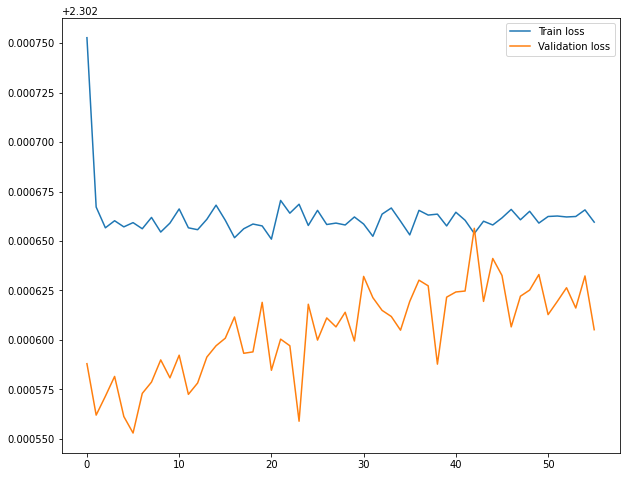

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history_cifar10_base_model.history["loss"], label="Train loss")
plt.plot(history_cifar10_base_model.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

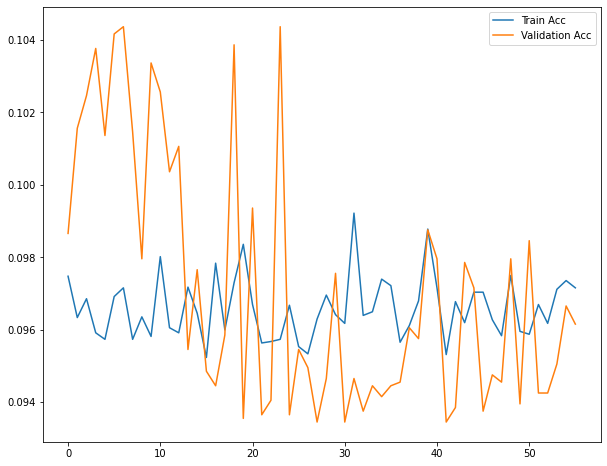

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history_cifar10_base_model.history["accuracy"], label="Train Acc")
plt.plot(history_cifar10_base_model.history["val_accuracy"], label="Validation Acc")
plt.legend()
plt.show()

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [ ]:
res_net_base =tf.keras.applications.ResNet50(include_top=False, input_shape=(200, 200, 3))

res_net_base.trainble = False 
res_net_base.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
__________________________

In [ ]:
Transfer_resnet_model=keras.models.Sequential([
res_net_base, 
keras.layers.Flatten(),
keras.layers.Dense(128,activation = 'relu'),                         
keras.layers.Dense(10,activation = 'softmax')
])
Transfer_resnet_model.compile(loss= keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=["accuracy"])
Transfer_resnet_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_18 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               12845184  
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total params: 36,434,186
Trainable params: 36,381,066
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
batchSize = 32
validationSetSize = 10_000
Image_size = 200

def transformdata(image,label):
  lable  =  tf.one_hot(label,10)
  return image,label

def randomise_image(image):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.random_flip_left_right(image)
  image = tf.image.convert_image_dtype(image, tf.float32)/255
  image = tf.image.resize(image, (Image_size, Image_size))
  return image
 
dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).map(lambda x,y:transformdata(x,y)).cache().map(lambda w,z:(randomise_image(w),z), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).shuffle(5*batchSize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((xtest,ytest)).map(lambda x,y:transformdata(x,y)).map(lambda w,z:(randomise_image(w),z), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE).batch(500)
val_dataset = dataset.take(validationSetSize).batch(batchSize)
train_dataset =dataset.skip(validationSetSize).batch(batchSize)
val_dataset.take(1)

<TakeDataset shapes: ((None, 200, 200, 3), (None, 1)), types: (tf.float32, tf.uint8)>

In [ ]:
#TODO

TB =TensorBoard(
    log_dir="./logs/ResNet cifar10 model",
    histogram_freq=0,
    write_images=True,
    write_graph=True
)

ES=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

history_cifar10_resnet_model=Transfer_resnet_model.fit(
      train_dataset,
      epochs=1000,
      steps_per_epoch=int(50000/batchSize), 
      validation_steps =int(10000/batchSize),
      verbose=0, validation_data=val_dataset,
      callbacks= [TB,ES]
      )

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
print("test score")
print(Transfer_resnet_model.evaluate(test_dataset, verbose=1))
Transfer_resnet_model.save("./drive/My Drive/cifar10 resent")
print("validation score")
print(Transfer_resnet_model.evaluate(val_dataset, verbose=1))
np.save('./drive/My Drive/cifar10 resnet.npy',history_cifar10_resnet_model.history)

### Task 2.2 Fast training of ResNet

*(weight ~10%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also, Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

In [ ]:
learning_rate_sch = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=5000,
    decay_rate=0.9)

res_net_lr_sch =tf.keras.applications.ResNet50(include_top=False, input_shape=(200, 200, 3))

res_net_lr_sch.trainble = False 
Transfer_resnet_model_lr_sch=keras.models.Sequential([
res_net_base, 
keras.layers.Flatten(),
keras.layers.Dense(128,activation = 'relu'),                         
keras.layers.Dense(10,activation = 'softmax')
])
Transfer_resnet_model_lr_sch.compile(loss= keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate_sch),metrics=["accuracy"])
Transfer_resnet_model_lr_sch.summary()

In [ ]:
from time import time


TB =TensorBoard(
    log_dir="./logs/ResNet cifar10 model",
    histogram_freq=0,
    write_images=True,
    write_graph=True
)

ES=EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=True,
)

training_start_time = time()

Transfer_resnet_model_lr_sch=Transfer_resnet_model.fit(
      train_dataset,
      epochs=1000,
      steps_per_epoch=int(50000/batchSize), 
      validation_steps =int(10000/batchSize),
      verbose=0, validation_data=val_dataset,
      callbacks= [TB,ES]
      )
traininig_finished_time =  time()
print(f"Training time :{traininig_finished_time-training_start_time}")



In [ ]:
print("test score")
print(history_cifar10_resnet_model.evaluate(test_dataset, verbose=1))
Fine_tunning_model.save("./drive/My Drive/cifar10 resent")
print("validation score")
print(history_cifar10_resnet_model.evaluate(val_dataset, verbose=1))
np.save('./drive/My Drive/cifar10 resnet.npy',history_cifar10_resnet_model.history)

### Task 2.3 Performance comparison

*(weight ~3%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

## Task 3 (**HD level task**) Research on new models
*(weight ~10%)*

Today, ResNet has become a very mature ConvNet architecture. In this task, you will research one recent ConvNet architecture. You may choose an architecture from the reference list below.

Write a short report for your research, covering these points:

- Identify the main issues that your chosen architecture aims to address. (For example, does it try to reduce the number of parameters or to speed up the training?)
- What measures the architecture used to reduce the number of parameters, or reducing the training cost, or improving the model performance?

Implement the architecture and compare its performance on CIFAR10 with ResNet. You may include your implementation, experiments, and analyses here in this notebook.

**References**:

1. Huang G, Liu Z, Van Der Maaten L, Weinberger KQ. *Densely connected convolutional networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2017 (pp. 4700-4708).
2. Zhang X, Zhou X, Lin M, Sun J. *Shufflenet: An extremely efficient convolutional neural network for mobile devices*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 6848-6856).
3. Tan M, Le Q. *Efficientnet: Rethinking model scaling for convolutional neural networks*. In International Conference on Machine Learning 2019 May 24 (pp. 6105-6114). PMLR.
4. Hu J, Shen L, Sun G. *Squeeze-and-excitation networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 7132-7141).


---
**END OF ASSIGNMENT TWO**